In [18]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

output = MultiParamOutputLoader("/nfs01/covid_sims//1591722531.3562934-asymptomatic_daily_self_report_p")

In [19]:
output.param_scenarios

['Nominal Faculty and Staff Parameters',
 'Optimistic Faculty and Staff Parameters',
 'Pessimistic Faculty and Staff Parameters',
 'Nominal Student Parameters',
 'Optimistic Student Parameters',
 'Pessimistic Student Parameters']

In [20]:
reopen_output = MultiParamOutputLoader("/nfs01/covid_sims/1591720627.0466504-test_protocol_QFNR")

In [35]:
def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_hosp_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_hosp(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_hosp(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_hosp(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


    
    

In [21]:
def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_infection_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_infections(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


    
    

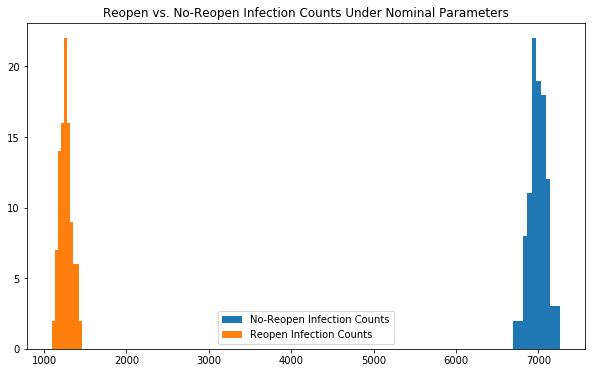

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

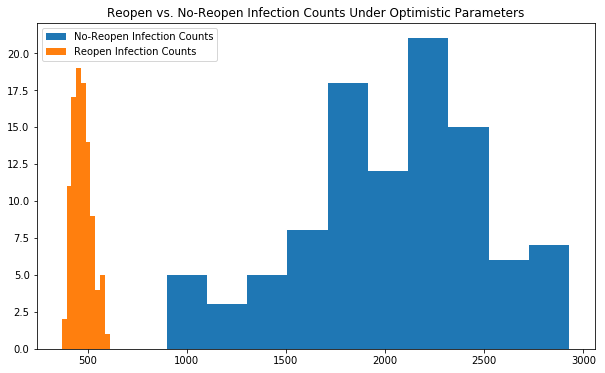

In [23]:
scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

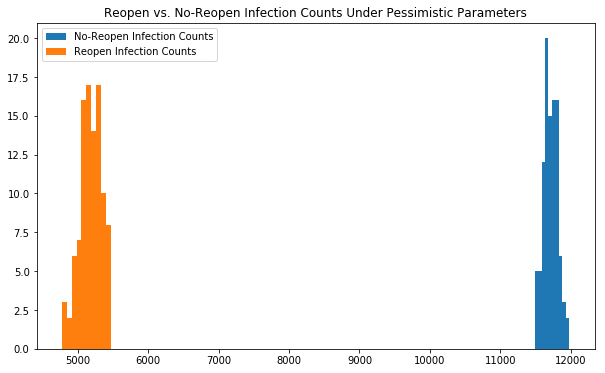

In [24]:
scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

In [41]:
agedist_output = MultiParamOutputLoader("/nfs01/covid_sims/1591748288.36406-asymptomatic_daily_self_report_p")

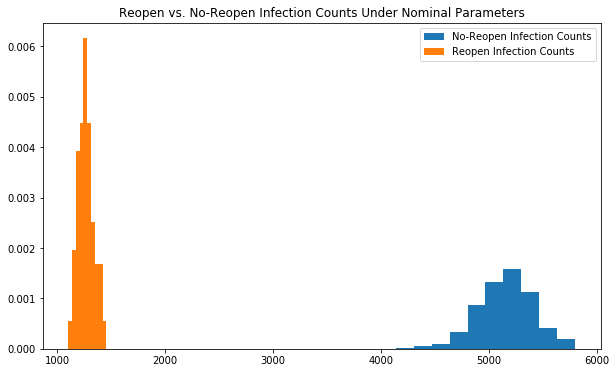

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

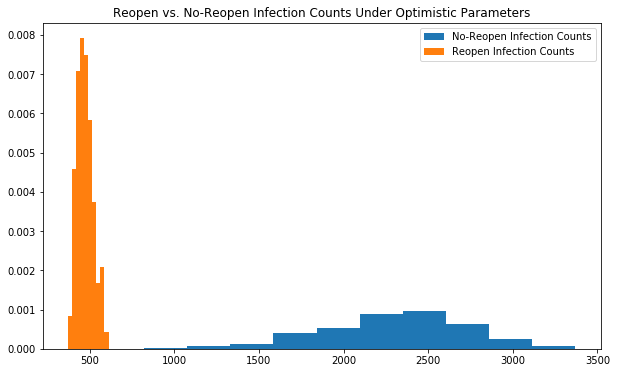

In [43]:
scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

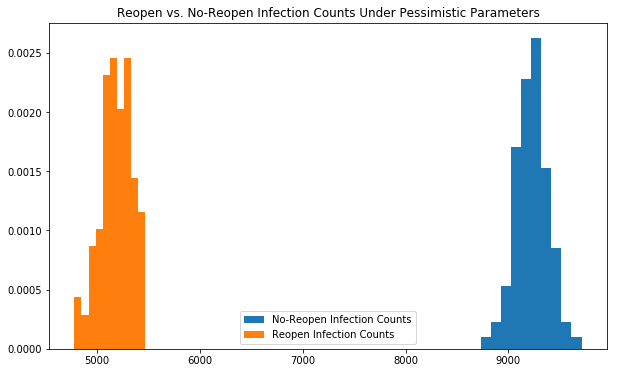

In [44]:
scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

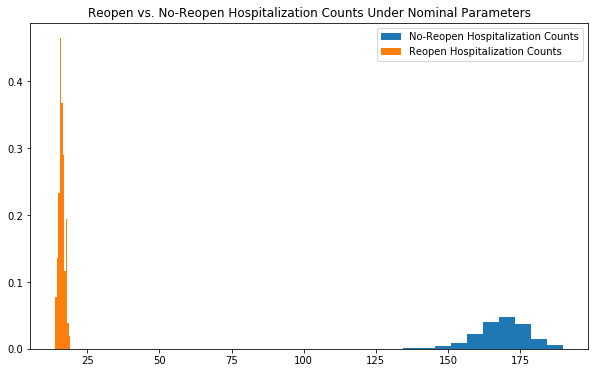

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

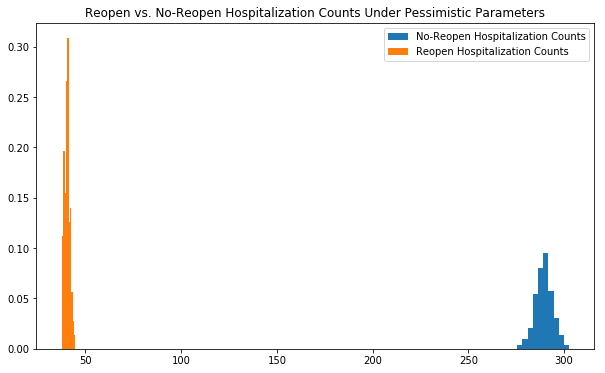

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

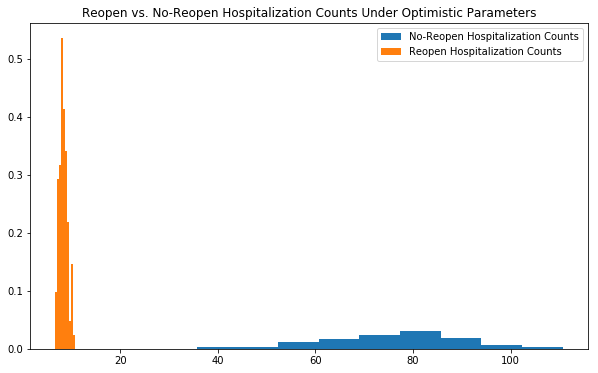

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

In [34]:
output.sim_results['Optimistic Faculty and Staff Parameters'][(0.0,)][0].columns

Index(['S', 'QS', 'QI', 'R', 'E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6',
       'pre_ID_0', 'pre_ID_1', 'pre_ID_2', 'pre_ID_3', 'ID_0', 'ID_1', 'ID_2',
       'ID_3', 'ID_4', 'ID_5', 'ID_6', 'ID_7', 'SyID_mild_0', 'SyID_mild_1',
       'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5',
       'SyID_mild_6', 'SyID_mild_7', 'SyID_mild_8', 'SyID_mild_9',
       'SyID_mild_10', 'SyID_mild_11', 'SyID_mild_12', 'SyID_mild_13',
       'SyID_mild_14', 'SyID_mild_15', 'SyID_mild_16', 'SyID_mild_17',
       'SyID_severe_0', 'SyID_severe_1', 'SyID_severe_2', 'SyID_severe_3',
       'SyID_severe_4', 'SyID_severe_5', 'SyID_severe_6', 'SyID_severe_7',
       'SyID_severe_8', 'SyID_severe_9', 'SyID_severe_10', 'SyID_severe_11',
       'SyID_severe_12', 'SyID_severe_13', 'SyID_severe_14', 'SyID_severe_15',
       'SyID_severe_16', 'SyID_severe_17', 'cumulative_mild',
       'cumulative_severe', 'cumulative_outside_infections', 'severity_0',
       'severity_1', 'severity_2', 'severity_3'

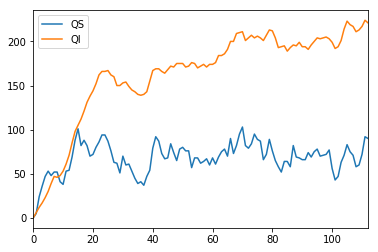

In [51]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][0][['QS','QI']].plot()

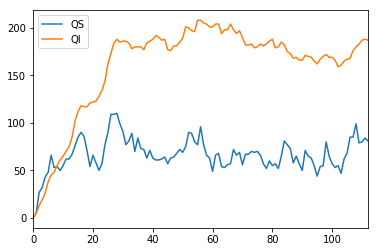

In [52]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][1][['QS','QI']].plot()

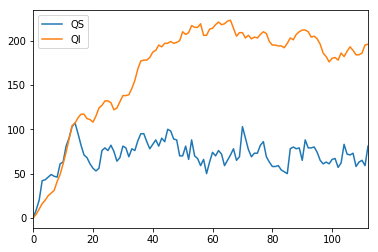

In [53]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][2][['QS','QI']].plot()

In [54]:
agedist_output = MultiParamOutputLoader("/nfs01/covid_sims/1591800602.9895172-asymptomatic_daily_self_report_p")

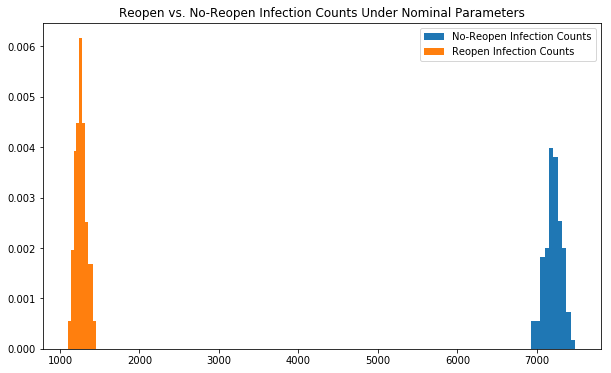

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

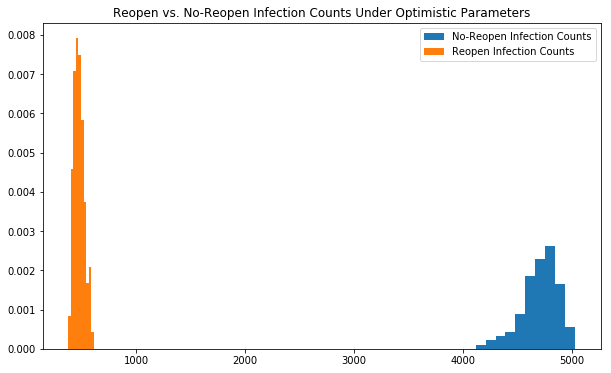

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

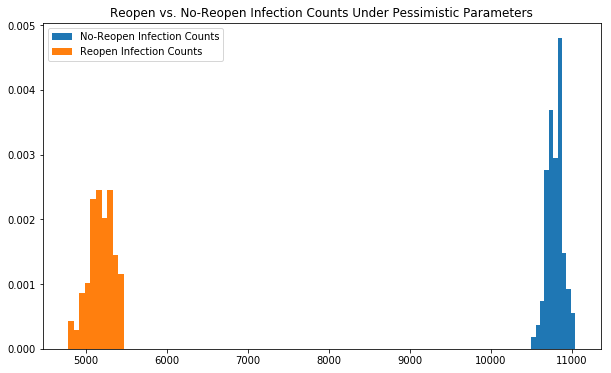

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

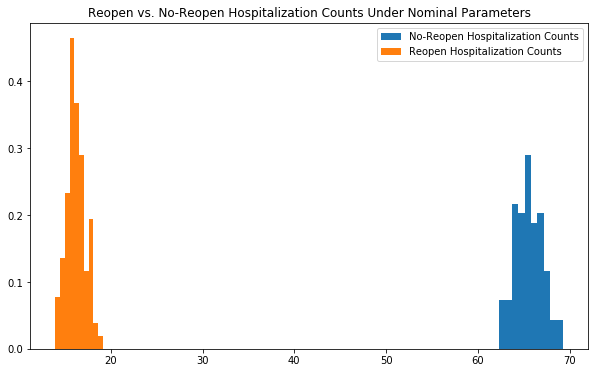

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

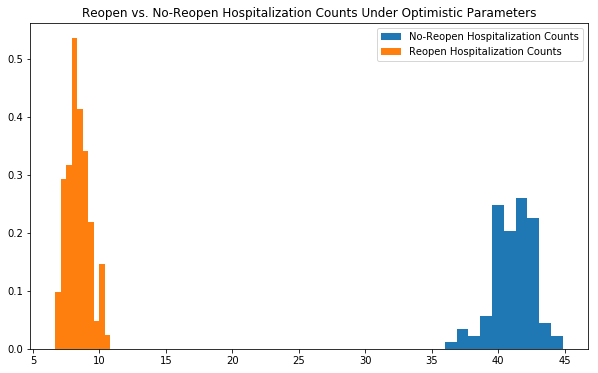

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

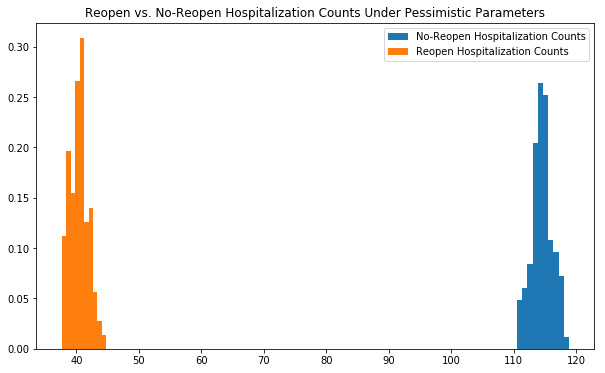

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()